In [217]:
# !pip install python-twitter
# !pip install GetOldTweets3

In [220]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex
import GetOldTweets3 as got
import datetime
import seaborn as sns

- Thomas - Dec 2017 - Jan 2018
- Mendocino - July 27, 2018 - Sep 18, 2018
- Carr - Not interesting
- Camp - Not interesting
- Soberanes - 
- Lilac - 4K acres.
- https://www.fire.ca.gov/media/10059/2017_redbook_final.pdf
- https://www.fire.ca.gov/media/10060/2016_redbook_final.pdf
- https://www.fire.ca.gov/media/10061/2015_redbook_final.pdf
- https://www.fire.ca.gov/stats-events/

### Thomas Wildfire Retrieval

In [308]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('thomasfire')\
                                           .setSince("2017-12-01")\
                                           .setUntil("2017-12-07")\
                                           .setMaxTweets(10_000)\
                                           .setEmoji("unicode")

    
    
# username = 'fryedpig'
# since_date = '2017-12-01'
# until_date = '2017-12-07'
# max_tweets = 10_000

# # Create first query object
# tweetCriteria = got.manager.TweetCriteria().setUsername(username).setSince(since_date).setUntil(until_date).setMaxTweets(max_tweets)

In [309]:
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

In [310]:
len(tweet)


10000

In [311]:
def df_builder(tweet):
    df = pd.DataFrame()
    temp = {}
    for i in range(len(tweet)):
        temp.update({i : [tweet[i].id, tweet[i].username, tweet[i].text, tweet[i].hashtags, tweet[i].date]})

    df = pd.DataFrame.from_dict(temp, orient = 'index', columns = ['id', 'username', 'text', 'hashtags', 'date'])
    return df
    
    


In [312]:
df = df_builder(tweet)

In [313]:
#df = pd.read_csv('./data/Thomas_Fire_June_5_2020.csv')

In [314]:
df_distinct = df.drop_duplicates(subset=['date'])

In [315]:
df2 = df_distinct.sort_values(by = 'date', ascending = True)

In [316]:
print(df.shape)
print(df2.shape)
df2.head()

(10000, 5)
(9235, 5)


,id,username,text,hashtags,date
9999,938105120985722881,brooscampbell,Botanical Gardens/City Hall hiking trail. Man....,#ThomasFire,2017-12-05 17:57:44+00:00
9998,938105152128593920,MissNikkiAnn,The latest A Fight For Democracy! https://pape...,#tuesdaythoughts #thomasfire,2017-12-05 17:57:52+00:00
9997,938105198194524161,quirklawyers,Me and my 90 year old neighbor cutting line ri...,#ThomasFire,2017-12-05 17:58:03+00:00
9996,938105214082699270,jriversk,Nouvel #incendie majeur en #Californie #Ventur...,#incendie #Californie #Ventura #ThomasFire #Sa...,2017-12-05 17:58:06+00:00
9995,938105308575961088,MyaNikitaEtc,"from VCF scanner Canana Larga, small fire in t...",#ThomasFire,2017-12-05 17:58:29+00:00


In [317]:
list(zip(df2['text'].tail(),df2['date'].tail()))

[('#ThomasFire: Any residents in the Ojai Valley that are not under a mandatory evacuation are under a voluntary evacuation order.',
  Timestamp('2017-12-06 23:59:12+0000', tz='UTC')),
 ('Suddenly Hurricane Sandy doesn’t seem so bad. Hope LA residents make it out okay #ThomasFire ',
  Timestamp('2017-12-06 23:59:15+0000', tz='UTC')),
 ('So sad #ThomasFire consume decenas de viviendas 🏡 se estiman más de 150 estructuras destruidas 🔥 stay safe! Más en @Univision34LA',
  Timestamp('2017-12-06 23:59:24+0000', tz='UTC')),
 ('Good point. 33 and 101 are both currently open according to http://readyventuracounty.org. Be careful if taking 33 south; it heads in the direction of the fire front and may close at any time. #ThomasFire ',
  Timestamp('2017-12-06 23:59:32+0000', tz='UTC')),
 ('😢🐾🙏🏽 RT @I_AMShaya: Can we all please share this? #wildfire #Skirballfire #Thomasfire #LA #Animals #helpneeded https://twitter.com/I_AMShaya/status/938551073517768706/photo/1',
  Timestamp('2017-12-06 23:59:53+0

In [318]:
list(zip(df2['text'].head(),df2['date'].head()))

[('Botanical Gardens/City Hall hiking trail. Man. #ThomasFire ',
  Timestamp('2017-12-05 17:57:44+0000', tz='UTC')),
 ('The latest A Fight For Democracy! https://paper.li/MissNikkiAnn/a-fight-for-democracy?edition_id=ce9c08c0-d9e5-11e7-93ba-0cc47a0d15fd #tuesdaythoughts #thomasfire',
  Timestamp('2017-12-05 17:57:52+0000', tz='UTC')),
 ('Me and my 90 year old neighbor cutting line right now at the ranch. #ThomasFire ',
  Timestamp('2017-12-05 17:58:03+0000', tz='UTC')),
 ("Nouvel #incendie majeur en #Californie #Ventura #ThomasFire #SantaBarbara #LosAngeles. Déjà au moins un mort et des dizaines d'habitations détruites sur une zone très étendue.",
  Timestamp('2017-12-05 17:58:06+0000', tz='UTC')),
 ('from VCF scanner Canana Larga, small fire in the median, going up slope, and fire spotted WEST of 33 HWY. #ThomasFire',
  Timestamp('2017-12-05 17:58:29+0000', tz='UTC'))]

In [319]:
# Search the title for the presence of a string of our choice
def searcher(string1, string2):
    flags = []
    for item1, item2 in zip(df2['text'],df2['date']):
        
        if ((string1 in item1) or (string2 in item1)):
            flags.append(True)
        else:
            flags.append(False)
    df2['a_ff'] = flags
            
searcher('arson', 'flaseflag')

In [320]:
df2[df2['a_ff'] == True]

,id,username,text,hashtags,date,a_ff
8551,938136094440226816,carlo_spiga,CA #ARSONIST SENTENCED TO 80 YEARS http://www....,#ARSONIST #ThomasFire #fire #CaliforniaWildfir...,2017-12-05 20:00:49+00:00,True
8456,938138468869443584,DidYouMissThis1,Pretty sure the California Fires are a False F...,#ThomasFire,2017-12-05 20:10:15+00:00,True
5949,938210554585350144,MImi_TheSound,"Just so angry, these three fires have to be th...",#RyeFire #CreekFire #ThomasFire,2017-12-06 00:56:41+00:00,True
5678,938219610670743552,21engine,@CarsonFireDept is responding to the #ThomasFi...,#ThomasFire,2017-12-06 01:32:41+00:00,True
3210,938420449356038145,IRachelLara,Has arson been ruled out yet? Seems like a lot...,#losangeles #fire #creekfire #thomasfire #ryef...,2017-12-06 14:50:44+00:00,True


In [307]:
df2['hashtags']

5000                #ThomasFire
4999    #SchoolFire #ThomasFire
4998                #ThomasFire
4997                #ThomasFire
4996                #ThomasFire
                 ...           
4                   #ThomasFire
3        #ThomasFire #TravelBan
2                   #ThomasFire
1                   #Thomasfire
0          #thomasfire #Ventura
Name: hashtags, Length: 4495, dtype: object

In [222]:
df.to_csv('./data/Thomas_Fire_June_5_2020.csv')

In [248]:
df2[df2['arson'] == True]

,Unnamed: 0,id,username,text,hashtags,date,arson
3049,3049,937948898768719872,fryedpig,#ThomasFire has to have been done by arsonists...,#ThomasFire,2017-12-05 07:36:58+00:00,True
2787,2787,937954509657030657,mlondonwmz,"as with the #thomasfire, the #GOP arson spree ...",#thomasfire #GOP,2017-12-05 07:59:16+00:00,True


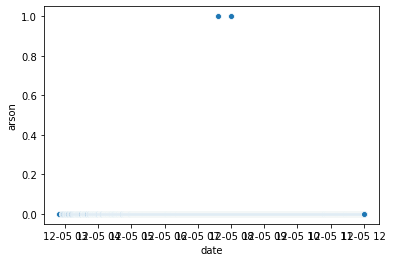

In [216]:
sns.scatterplot(df2['date'], df2['arson'])


In [12]:
#Decided to print those tweets just for a sanity check. They are mostly useless in my opinion.
for t in df_hashtag_thomas['text'][:10]:
    display(Markdown(f">{t}"))

>Thomas fire becomes largest wildfire on record in California http://www.latimes.com/local/lanow/la-me-thomas-fire-size-20171222-20171222-htmlstory.html #ThomasFire #california #wildfires #latimes @latimes

>Please follow the Twitter page of this documentary I am helping with about the recent Thomas Fire in the Ojai Valley. #ThomasFire #wildfire #ojai #ojaivalley @OVN #venturacounty #climatechange #weneedrain #California #wildfire2017 #documentary

>California #Thomas #wildfire to cost re/insurers up to $2.5bn: RMS http://www.artemis.bm/blog/2018/01/22/california-thomas-wildfire-to-cost-reinsurers-up-to-2-5bn-rms/

>The Thomas Fire, now largest in the state’s recorded history, was announced as completely contained as of last week. #Wildfire #California #ThomasFire

>Thomas Fire, California's Largest On Record, Is Now 100 Percent Contained https://buff.ly/2D1YUMk #California #WildFire #Weather #HealthAndSafety #ThomasFire

>Thomas fire, California's largest on record, finally 100% contained. #ThomasFire #LAFires #Wildfires http://www.latimes.com/local/lanow/la-me-thomas-fire-contained-20180112-story.html

>Thomas fire was the worst wildfire in California's history. Hopefully, the mudslides in the burned areas won't be the worst mudslides in history. . #ThomasFire #mudslides #Ventura #Ojai #Montecito #SantaPaula

>The #Thomas Fire of 2017 is the largest known wildfire in California’s modern history. It burned more than 281,000 acres and is just one of the fires that has made this the costliest year for wildfires in U.S. history. Find out more here: http://bit.ly/PKEarthSpaceScience

>Some fires still visible in the northern part of the Thomas Fire #California #USA 28 Dec 2017 #Copernicus #Sentinel-2B Full-size: https://flic.kr/p/22YVuHD More: https://flic.kr/s/aHskymzjE6 #ThomasFire #CaliforniaWildfires #Wildfire 

>Natural color version: New images of the now 91% contained Thomas Fire #California #USA 28 Dec 2017 #Copernicus #Sentinel-2B Full-size: https://flic.kr/p/22YVwFM More: https://flic.kr/s/aHskymzjE6 #ThomasFire #CaliforniaWildfires #Wildfire 